# Homework 2: Problems
## Due Friday 26 October

### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1  (50 points)
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.


## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started. 

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.         

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
np.random.seed(42)

In [3]:
N = 3
mu = 1.0
sigma = 0.2 
sample = norm(loc=mu,scale=sigma).rvs(N)
print(sample)

[1.09934283 0.97234714 1.12953771]


In [4]:
muGrid = np.linspace(0,2,1000)
L = []

for i in range(N):
    L.append(norm.pdf(muGrid,loc=sample[i],scale=sigma))

Ltot = np.array(L)
Lprod = np.prod(Ltot,axis=0)

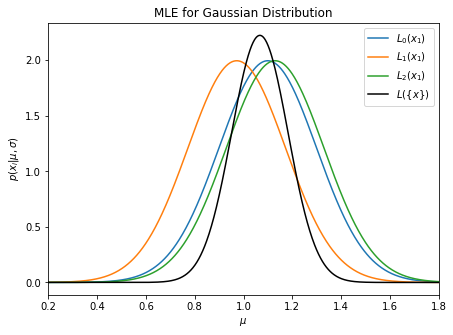

In [5]:
fig, ax = plt.subplots(figsize=(7, 5))

for i in range(N):
    _ = plt.plot(muGrid, L[i], ls='-', label=r'$L_{%d}(x_1)$' %i)

_ = plt.plot(muGrid, Lprod/N, ls='-', c='black', label=r'$L_{}(\{x\})$')

plt.xlim(0.2, 1.8)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

In [6]:
N = 10
mu = 1.0
sigma = 0.2 
sample = norm(loc=mu,scale=sigma).rvs(N)
print(sample)

[1.30460597 0.95316933 0.95317261 1.31584256 1.15348695 0.90610512
 1.10851201 0.90731646 0.90685405 1.04839245]


In [7]:
muGrid = np.linspace(0,2,1000)
L = []

for i in range(N):
    L.append(norm.pdf(muGrid,loc=sample[i],scale=sigma))

Ltot = np.array(L)
Lprod = np.prod(Ltot,axis=0)

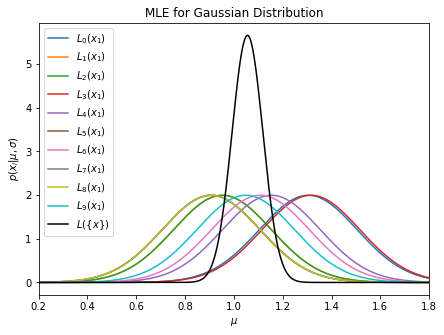

In [8]:
fig, ax = plt.subplots(figsize=(7, 5))

for i in range(N):
    _ = plt.plot(muGrid, L[i], ls='-', label=r'$L_{%d}(x_1)$' %i)

_ = plt.plot(muGrid, Lprod/N, ls='-', c='black', label=r'$L_{}(\{x\})$')

plt.xlim(0.2, 1.8)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

In [9]:
N = 10
mu = 1.0
sigma = 0.2 
sample = norm(loc=mu,scale=sigma).rvs(N)
print(sample)

[0.61734395 0.65501643 0.88754249 0.79743378 1.06284947 0.81839518
 0.71753926 1.29312975 0.95484474 1.01350564]


In [10]:
muGrid = np.linspace(0,2,1000)
L = []

for i in range(N):
    Lfull = norm.pdf(muGrid,loc=sample[i],scale=sigma)
    Lfull[muGrid < 1.1] = 0
    L.append(Lfull)

Ltot = np.array(L)
Lprod = np.prod(Ltot,axis=0)

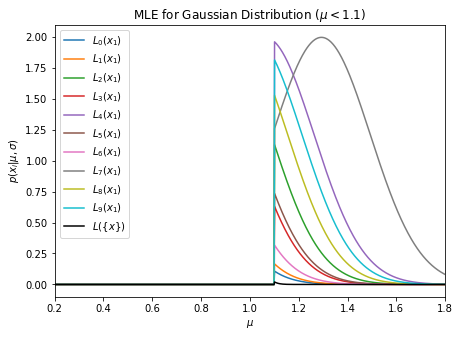

In [11]:
fig, ax = plt.subplots(figsize=(7, 5))

for i in range(N):
    _ = plt.plot(muGrid, L[i], ls='-', label=r'$L_{%d}(x_1)$' %i)

_ = plt.plot(muGrid, Lprod, ls='-', c='black', label=r'$L_{}(\{x\})$')

plt.xlim(0.2, 1.8)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution %s' % r'$(\mu < 1.1)$')
plt.legend()

## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started.

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astroML.plotting import hist as fancyhist

The final probability of a clear day is 0.826000


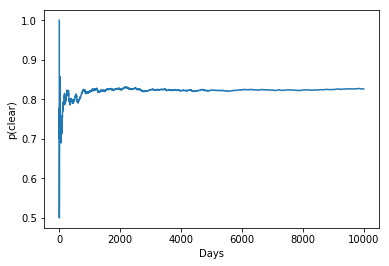

In [13]:
N = 10000
today = 0
tomorrow = -1

weather = np.array(())
days = np.arange(N)
pclear = np.array(())
clear = 0

for i in np.arange(N):
    p = np.random.random()
    if (today==0):
        if (p<=0.5):
            tomorrow = 0
        else:
            tomorrow = 1
    else:
        if (p<=0.1):
            tomorrow = 0
        else:
            tomorrow = 1
    weather = np.append(weather,tomorrow)
    
    if (tomorrow==1):
        clear += 1
    pclear = np.append(pclear,clear/(i+1))
    today = tomorrow

pclearf = clear/N
print('The final probability of a clear day is %f' %pclearf)

_ = plt.plot(days,pclear)
_ = plt.xlabel('Days')
_ = plt.ylabel('p(clear)')

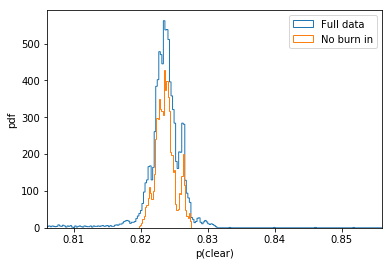

In [14]:
_ = fancyhist(pclear, bins="freedman", histtype="step", label="Full data")
_ = fancyhist(pclear[3500:], bins="freedman", histtype="step", label="No burn in")
_ = plt.xlim(pclearf-0.02,pclearf+0.03)
_ = plt.legend()
_ = plt.xlabel("p(clear)")
_ = plt.ylabel("pdf")